In [1]:
import urllib
import json
import yaml
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
## Update these two to choose case and location
config_name = 'casedec2020' # dictionary name of case study
location = 'klukwan' # name of location - grabs all the stations around that area

# import configuration file for station choice
yaml_doc = 'mesonet_config.yml'
config = yaml.load(open(yaml_doc), Loader=yaml.SafeLoader)
ddict = config[config_name]

stn_ids = config['stationids'][location]
stn_name= config['stationids'][location + '_name']
for i, (ids, name) in enumerate(zip(stn_ids, stn_name)):
    print(ids, name)

precip_varnames = ['precip_accum', 'precip_accum_one_minute', 'precip_accum_ten_minute',
                   'precip_accum_fifteen_minute', 'precip_accum_30_minute', 'precip_accum_one_hour',
                   'precip_accum_three_hour', 'precip_storm', 'precip_accum_six_hour', 
                   'precip_accum_24_hour', 'precip_smoothed', 'precip_manual', 'precip_accum_manual',
                   'precip_accum_5_minute_manual', 'precip_accum_10_minute_manual', 'precip_accum_15_minute_manual', 
                   'precip_accum_3_hour_manual', 'precip_accum_6_hour_manual', 'precip_accum_24_hour_manual',
                   'precip_interval', 'precip_accum_since_00utc', 'precip_accum_since_local_midnight', 'precip_accum_12_hour',
                   'precip_accum_five_minute', 'precip_accum_since_7_local', 'precip_accum_set_1']

QCHWC Chillkat FAA Web
CKTA2 Chillkat River Near
SPCA2 Sheep Camp
DWSA2 Dyea
TYAA2 Taiya River Near S


In [9]:
## Initial Query to determine available data
new_stn = []
new_stnname = []
new_varname = []

for i, (ids, name) in enumerate(zip(stn_ids, stn_name)):
    ddict['stids'] = ids # put the current station id in the response dict
    
    ## pull data
    apiString = urllib.parse.urlencode(ddict)
    url = "http://api.mesowest.net/v2/stations/timeseries"
    fullUrl = '{}?{}'.format(url,apiString)
    print(fullUrl)
    response = urllib.request.urlopen(fullUrl)
    responseDict = json.loads(response.read())
    
    ## get the variable names of the current station
    dictkeys = responseDict['STATION'][0]['OBSERVATIONS'].keys()
    # print(dictkeys)
    for j, precip_varname in enumerate(precip_varnames):
        if precip_varname in dictkeys:
            print(ids, name, precip_varname)
            # if a precipitation variable is found in the given data
            # append that info to new lists 
            new_stn.append(ids)
            new_stnname.append(name)
            new_varname.append(precip_varname)


http://api.mesowest.net/v2/stations/timeseries?start=202011280000&end=202012040000&obtimezone=UTC&stids=QCHWC&token=6f7bc78232734beab9da77235a2bd351
http://api.mesowest.net/v2/stations/timeseries?start=202011280000&end=202012040000&obtimezone=UTC&stids=CKTA2&token=6f7bc78232734beab9da77235a2bd351
http://api.mesowest.net/v2/stations/timeseries?start=202011280000&end=202012040000&obtimezone=UTC&stids=SPCA2&token=6f7bc78232734beab9da77235a2bd351
SPCA2 Sheep Camp precip_accum_set_1
http://api.mesowest.net/v2/stations/timeseries?start=202011280000&end=202012040000&obtimezone=UTC&stids=DWSA2&token=6f7bc78232734beab9da77235a2bd351
DWSA2 Dyea precip_accum_set_1
http://api.mesowest.net/v2/stations/timeseries?start=202011280000&end=202012040000&obtimezone=UTC&stids=TYAA2&token=6f7bc78232734beab9da77235a2bd351
TYAA2 Taiya River Near S precip_accum_set_1


<AxesSubplot:>

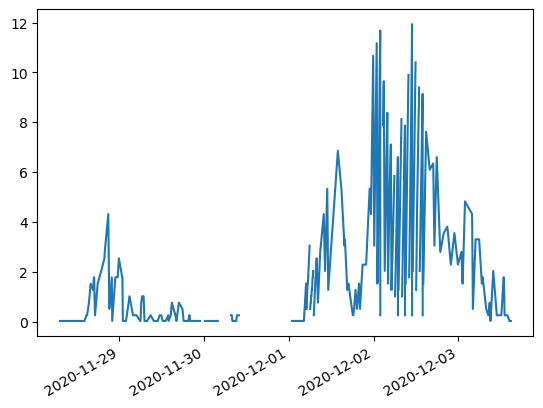

In [14]:
dateTime = responseDict['STATION'][0]['OBSERVATIONS']['date_time']
newvar = responseDict['STATION'][0]['OBSERVATIONS']['precip_accum_one_hour_set_1']
ksea = pd.Series(newvar,index=pd.to_datetime(dateTime))

ksea.plot()

In [15]:
ksea

2020-11-28 00:54:00+00:00   NaN
2020-11-28 01:09:00+00:00   NaN
2020-11-28 01:54:00+00:00   NaN
2020-11-28 02:54:00+00:00   NaN
2020-11-28 03:15:00+00:00   NaN
                             ..
2020-12-03 23:15:00+00:00   NaN
2020-12-03 23:20:00+00:00   NaN
2020-12-03 23:25:00+00:00   NaN
2020-12-03 23:30:00+00:00   NaN
2020-12-03 23:54:00+00:00   NaN
Length: 526, dtype: float64

2020-11-28 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-28 01:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-28 02:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-28 03:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-11-28 04:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
                                           ...                
2020-12-03 19:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-12-03 20:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-12-03 21:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-12-03 22:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-12-03 23:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: H, Length: 144, dtype: object

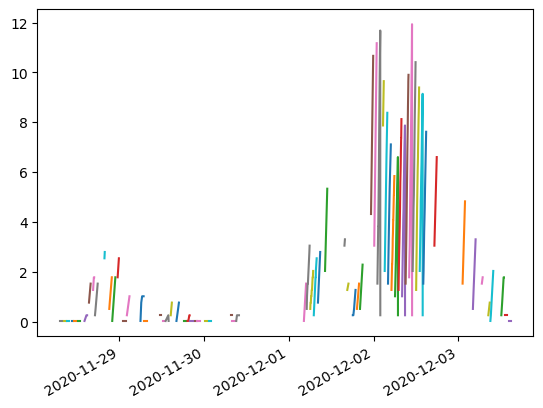

In [17]:
test = ksea.resample('1H')
test.plot()

In [ ]:
test.values

<AxesSubplot:>

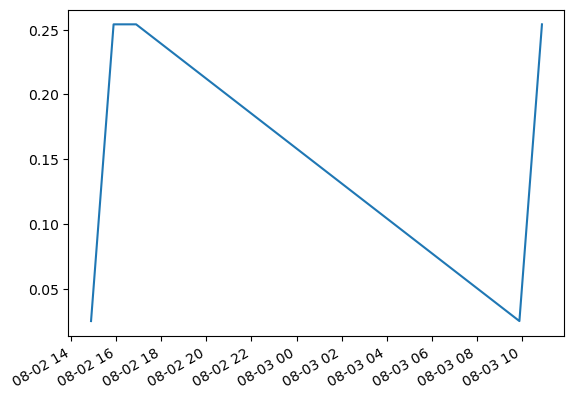

In [15]:
ksea = ksea.where(ksea.index.minute == 53).dropna()
ksea.plot()

In [12]:
isinstance(v, collections.abc.Mapping)
for i, varname in enumerate(precip_varnames):
    # check to see if precip var is available
    
    newvar = responseDict['STATION'][0]['OBSERVATIONS']['precip_accum_one_hour_set_1']

from collections.abc import Mapping

if isinstance(precip_varnames, Mapping):
    print('yes')
    
#     try:
#     items = any_object.items()
# except (AttributeError, TypeError):
#     non_items_behavior(any_object)
# else: # no exception raised
#     for item in items: ...